In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from scipy.io import readsav

import bagpipes as pipes

In [2]:
"""The format of the spectrum returned by load_data should be a 2D array with three columns: 
wavelengths in Angstroms, fluxes in erg/s/cm^2/A and flux errors in the same units 
(can be changed to microJansksys with 
the spec_units keyword argument). These will be stored in galaxy.spectrum.
"""

def load_malin2(ID):
    if not hasattr(load_malin2, 'f1'):
        load_malin2.f1 = readsav('Malin2binned.sav')
    # Do some stuff to load up data for the object with the correct ID number
    ID = int(ID)
    rough_spec = load_malin2.f1['binned_spec'][ID,:] + 0 
    rough_err = load_malin2.f1['binned_err'][ID,:] + 0
    # Rough cut to chop off bad pixels
    
    bp = np.where((rough_spec < 0) | (rough_spec > 4))[0]
    
    rough_spec[bp] = 0
    rough_err[bp] = 1e6
    
    spectrum = np.vstack([f1['wave'], rough_spec, rough_err])
    

    return spectrum.T


In [3]:
f1 = readsav('Malin2binned.sav')


(0.0, 2.0)

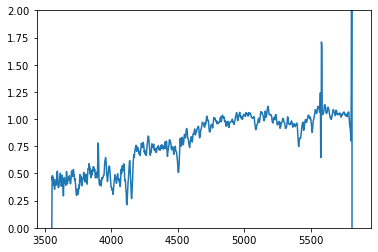

In [4]:
plt.plot(np.exp(f1['wave']), f1['binned_spec'][0,:])
plt.ylim([0,2])

In [5]:
f1['binned_spec'][0]

array([-6.78388355e-03,  3.65459055e-01,  4.78690952e-01, ...,
       -2.75527169e+18, -2.75527169e+18, -2.62945924e+18])

In [6]:
# ok, how do I make this a bagpies object?
ack = load_malin2(0)
ack.shape

(1024, 3)

In [7]:
#plt.plot(ack[:,1])
ack[:,1].max()

3.3214943408966064

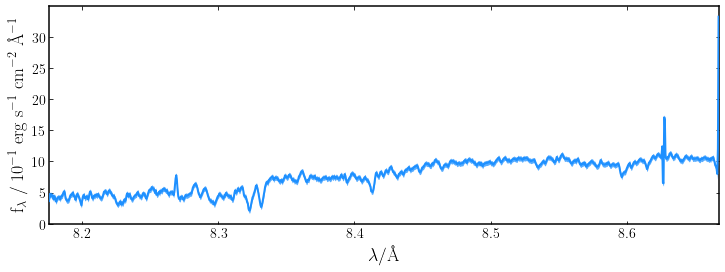

In [15]:
# ok, we have a spectra loaded up. Not too shabby. 
ID_number = 0

galaxy = pipes.galaxy(ID_number, load_malin2, filt_list=[], photometry_exists=False)

fig, ax = galaxy.plot()


In [9]:


exp = {}                          # Tau model star formation history component
exp["age"] = 3.                   # Gyr
exp["tau"] = 0.75                 # Gyr
exp["massformed"] = 9.            # log_10(M*/M_solar)
exp["metallicity"] = 0.5          # Z/Z_oldsolar

dust = {}                         # Dust component
dust["type"] = "Calzetti"         # Define the shape of the attenuation curve
dust["Av"] = 0.2                  # magnitudes

model_components = {}                   # The model components dictionary
model_components["redshift"] = 1.0      # Observed redshift  
model_components["exponential"] = exp   
model_components["dust"] = dust

In [10]:
goodss_filt_list = np.loadtxt("filters/goodss_filt_list.txt", dtype="str")

In [11]:
model = pipes.model_galaxy(model_components, filt_list=goodss_filt_list)

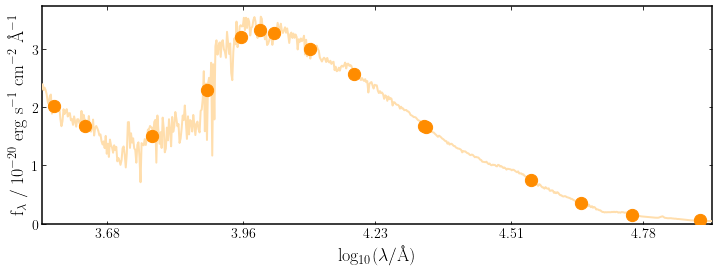

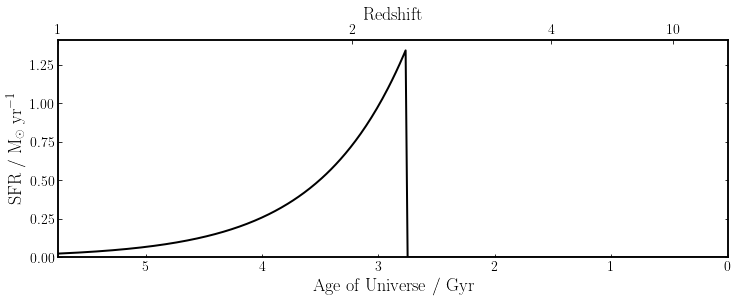

In [12]:
fig = model.plot()
fig = model.sfh.plot()
